#🛠️ Preparação dos Dados

### Importação dos dados

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


df = pd.read_csv('/content/dados_tratados.csv')
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Monthtomonth,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Monthtomonth,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Monthtomonth,Yes,Mailed check,83.9,267.40


### Remoção de colunas irrelevantes

In [107]:
colunas_para_remover = ['customerID', 'gender', 'MultipleLines']
df_filtrado = df.drop(columns=colunas_para_remover)

print("\nPrimeiras 5 linhas do dataset filtrado:")
df_filtrado.head()


Primeiras 5 linhas do dataset filtrado:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,0,Yes,Yes,9,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,0,No,No,9,Yes,DSL,No,No,No,No,No,Yes,Monthtomonth,No,Mailed check,59.9,542.40
2,Yes,0,No,No,4,Yes,Fiber optic,No,No,Yes,No,No,No,Monthtomonth,Yes,Electronic check,73.9,280.85
3,Yes,1,Yes,No,13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Monthtomonth,Yes,Electronic check,98.0,1237.85
4,Yes,1,Yes,No,3,Yes,Fiber optic,No,No,No,Yes,Yes,No,Monthtomonth,Yes,Mailed check,83.9,267.40


### Encoding

In [108]:
colunas_categoricas = df_filtrado.select_dtypes(include='object').columns.tolist()
df_encoded = pd.get_dummies(df_filtrado, columns=colunas_categoricas, drop_first=True)

print("Primeiras 5 linhas do dataset após a codificação:")
df_encoded.head()

Primeiras 5 linhas do dataset após a codificação:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,False,False,True,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,False,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,True,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True


### Verificação da Proporção de EvasãoVerificação da Proporção de Evasão

Contagem de clientes por classe (Churn):
Churn_Yes
False    5174
True     1869
Name: count, dtype: int64




/tmp/ipython-input-2968893874.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proporcao_churn_nao = (churn_counts[0] / total_clientes) * 100
/tmp/ipython-input-2968893874.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  proporcao_churn_sim = (churn_counts[1] / total_clientes) * 100


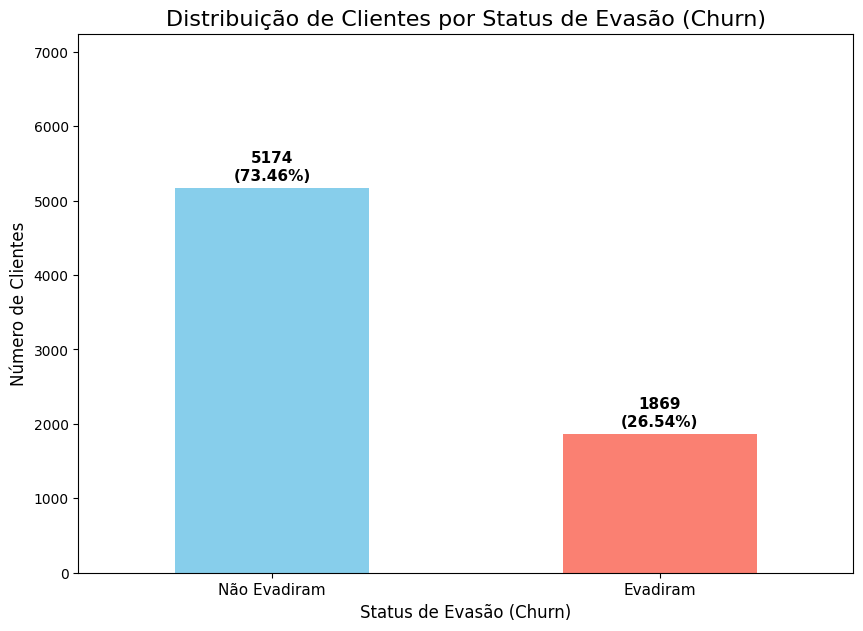

In [109]:
# Calcula a contagem de clientes que evadiram (Churn=1) e que permaneceram (Churn=0)
churn_counts = df_encoded['Churn_Yes'].value_counts()
print("Contagem de clientes por classe (Churn):")
print(churn_counts)
print("\n" + "="*50 + "\n")

# Calcula a proporção de cada classe
total_clientes = churn_counts.sum()
proporcao_churn_nao = (churn_counts[0] / total_clientes) * 100
proporcao_churn_sim = (churn_counts[1] / total_clientes) * 100

plt.figure(figsize=(10, 7))

churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribuição de Clientes por Status de Evasão (Churn)', fontsize=16)
plt.xlabel('Status de Evasão (Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.ylim(0, churn_counts.max() * 1.4)
plt.xticks(ticks=[0, 1], labels=['Não Evadiram', 'Evadiram'], rotation=0, fontsize=11)

total_clientes = churn_counts.sum()
for index, value in enumerate(churn_counts):
    plt.text(index, value + 100, f'{value}\n({(value/total_clientes)*100:.2f}%)', ha='center', fontsize=11, fontweight='bold')

plt.show()

#🎯 Correlação e Seleção de *Variáveis*

### Visualizando a Matriz de Correlação

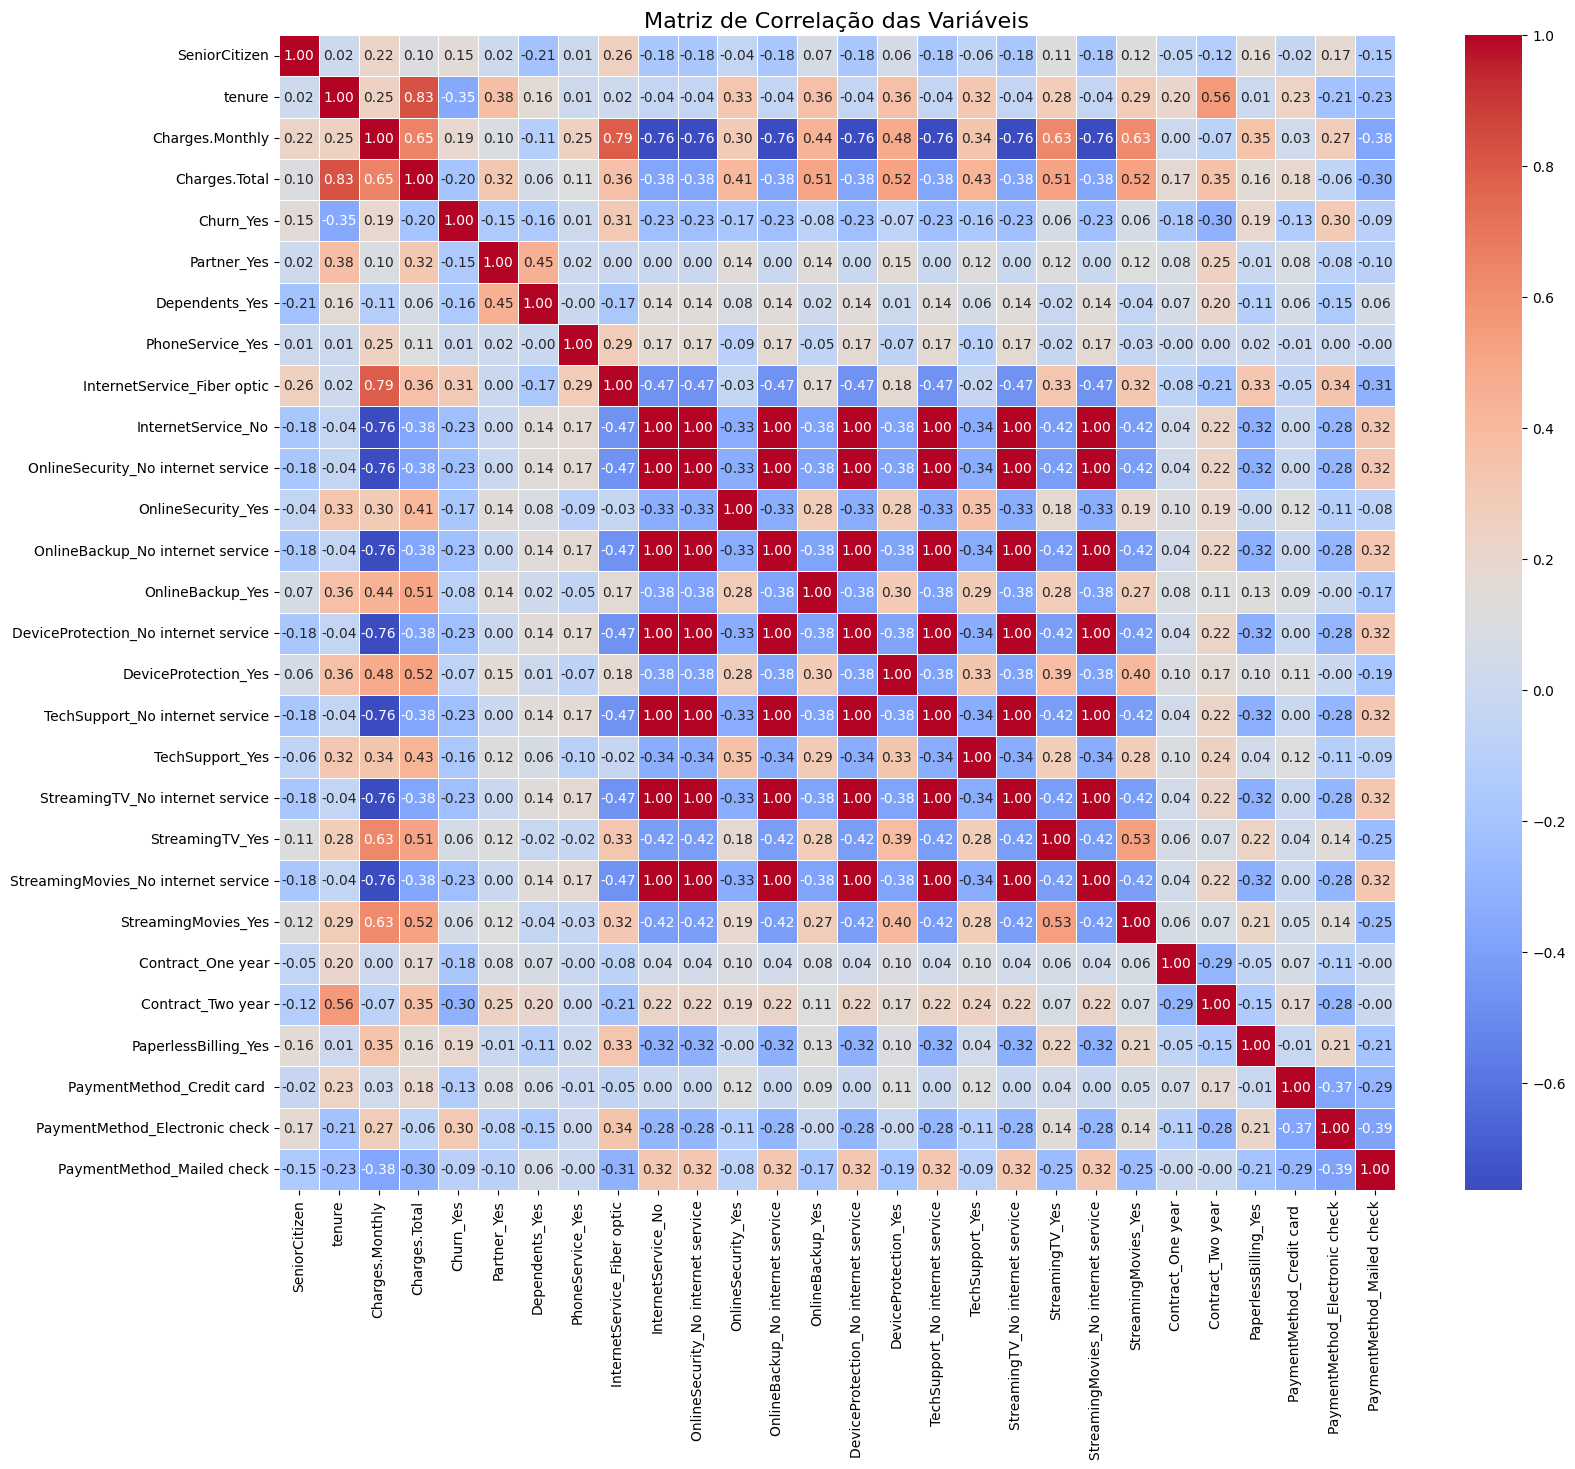

In [110]:
# Removendo a coluna 'Churn_Label' antes de calcular a matriz de correlação, pois ela contém strings.
df_numeric = df_encoded
correlation_matrix = df_numeric.corr()
correlation_with_churn = correlation_matrix['Churn_Yes']

top_correlated_features = correlation_with_churn[abs(correlation_with_churn) > 0.1].index.tolist()
top_correlated_matrix = df_numeric[top_correlated_features].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 10})
plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.show()

Essa matriz de correlação mostra o quanto cada variável se relaciona linearmente com as outras, variando de **-1** (correlação negativa perfeita) até **+1** (correlação positiva perfeita). Aqui vão alguns pontos que saltam aos olhos:

---

## 🔍 **Principais observações**

1. **Churn\_Yes**

   * Correlação **positiva** moderada com `InternetService_Fiber optic` (\~0.31), sugerindo que clientes com fibra óptica têm maior tendência de evasão.
   * Correlação **negativa** forte com `tenure` (\~-0.35): clientes que ficam há mais tempo tendem a não evadir.
   * Correlação **positiva** com `MonthlyCharges` (\~0.19): mensalidades mais altas podem estar associadas a mais churn.

2. **Tenure (tempo de permanência)**

   * Correlação forte e **positiva** com `TotalCharges` (\~0.83) — esperado, já que quanto mais tempo o cliente permanece, mais ele paga no total.
   * Correlação **negativa** forte com variáveis de “No internet service” (\~-0.76) — provavelmente clientes sem internet são mais antigos ou de planos antigos.

3. **MonthlyCharges**

   * Correlação **positiva** forte com `InternetService_Fiber optic` (\~0.79) — fibra tende a ser mais cara.
   * Correlação **negativa** moderada com variáveis “No internet service” (\~-0.66 a -0.76).

4. **Agrupamentos de serviços**

   * Várias variáveis como `OnlineSecurity_Yes`, `OnlineBackup_Yes`, `TechSupport_Yes` têm **correlações positivas** entre si (\~0.3), sugerindo que clientes que contratam um serviço adicional tendem a contratar outros.

5. **Contratos**

   * `Contract_Two year` tem correlação **negativa** forte com Churn (\~-0.3) — contratos longos reduzem evasão.
   * `Contract_Month-to-month` (não está diretamente no gráfico, mas inferida pelo “Não dois anos” e “Não um ano”) provavelmente tem correlação positiva com churn.

---

## 📌 **Interpretação prática**

* Clientes **antigos** e com **contratos mais longos** são menos propensos a evadir.
* Clientes com **fibra óptica** e **mensalidade alta** estão mais associados à evasão — talvez por questões de custo ou expectativa de qualidade.
* Serviços adicionais andam juntos: quem contrata um, costuma contratar vários.

---

Se você quiser, posso gerar um **resumo só das correlações mais fortes com Churn** e explicar como cada uma pode ser usada para previsão. Isso deixaria a análise bem focada no que interessa para entender a evasão. Quer que eu faça?


### Análises Direcionadas

###Gráfico 1: Boxplot - Tempo de Contrato (tenure) vs. Evasão

/tmp/ipython-input-485521482.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='tenure', data=df_visualizacao, palette='Set2')


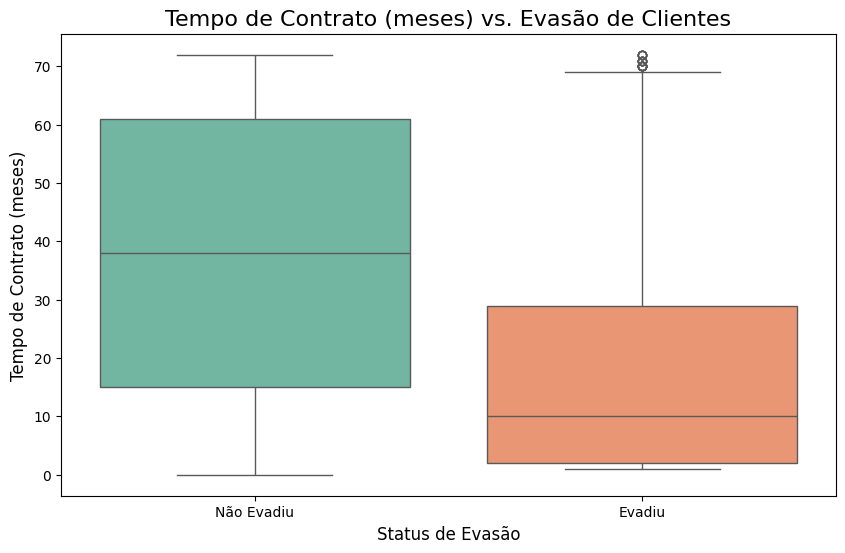

In [111]:
df_visualizacao = df_encoded.copy()
df_visualizacao['Churn_Label'] = df_visualizacao['Churn_Yes'].apply(lambda x: 'Evadiu' if x == True else 'Não Evadiu')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Label', y='tenure', data=df_visualizacao, palette='Set2')
plt.title('Tempo de Contrato (meses) vs. Evasão de Clientes', fontsize=16)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.show()

O boxplot mostra que clientes que não evadiram têm, em média, um tempo de contrato (tenure) muito maior do que os que evadiram.
Isso reforça a correlação negativa entre tempo de permanência e churn: quanto mais tempo o cliente está na empresa, menor a probabilidade de cancelar.

### Total Gasto (TotalCharges) vs. Evasão

/tmp/ipython-input-1000516012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='Charges.Total', data=df_visualizacao, palette='coolwarm')


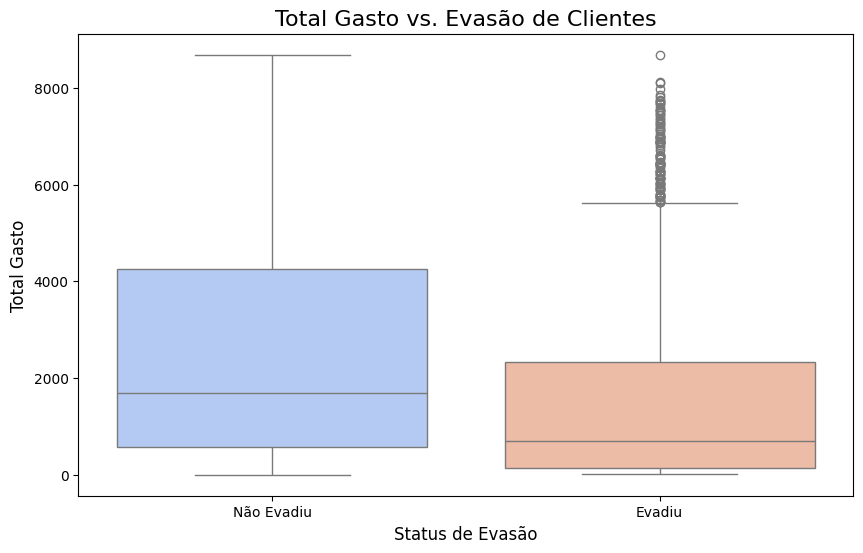

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Label', y='Charges.Total', data=df_visualizacao, palette='coolwarm')
plt.title('Total Gasto vs. Evasão de Clientes', fontsize=16)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.show()

O boxplot mostra que clientes que **não evadiram** têm valores de **TotalCharges** significativamente mais altos, indicando que permaneceram mais tempo e gastaram mais com a empresa. Isso reforça a correlação negativa: quanto maior o gasto acumulado, menor a probabilidade de churn.


🤖 Modelagem Preditiva

###Separação de Dados

In [113]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# Dividir o dataset em conjuntos de treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape do conjunto de treino (X_train): {X_train.shape}")
print(f"Shape do conjunto de teste (X_test): {X_test.shape}")

Shape do conjunto de treino (X_train): (5634, 27)
Shape do conjunto de teste (X_test): (1409, 27)


### Modelo de Regressão Logística (com Padronização)

Justificativa: A Regressão Logística é um modelo linear que funciona bem para problemas de classificação binária. No entanto, sua performance é muito afetada pela escala das variáveis. Por isso, a padronização é um passo crucial para garantir que todas as variáveis (tenure, MonthlyCharges, TotalCharges) tenham a mesma importância no modelo

✅ Avaliação do Modelo de Regressão Logística
Acurácia: 0.80

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.84      0.89      0.87      1035
        True       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



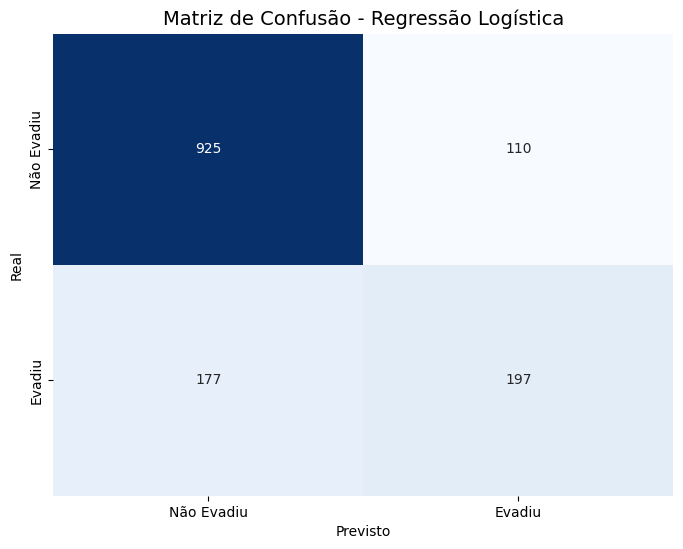

In [114]:
# Criando e treinando o modelo
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

# ➡️ Previsões no conjunto de teste e avaliação
y_pred_lr = model_lr.predict(X_test_scaled)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print("✅ Avaliação do Modelo de Regressão Logística")
print(f"Acurácia: {acuracia_lr:.2f}\n")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr))

# Gerando o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística', fontsize=14)
plt.show()

### Modelo Random Forest (sem Padronização)


Justificativa: O Random Forest é um modelo de ensemble baseado em árvores de decisão. Ao contrário da Regressão Logística, ele não é sensível à escala das variáveis, o que o torna ideal para ser treinado diretamente com os dados originais (não padronizados). É um modelo robusto e geralmente apresenta alta precisão.

✅ Avaliação do Modelo Random Forest
Acurácia: 0.78

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.82      0.89      0.86      1035
        True       0.61      0.46      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



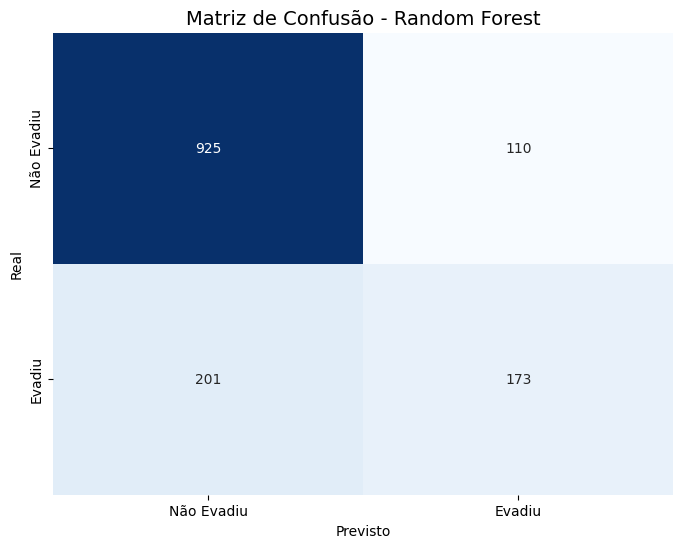

In [115]:
# Criando e treinando o modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# ➡️ Previsões no conjunto de teste e avaliação
y_pred_rf = model_rf.predict(X_test)
acuracia_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("✅ Avaliação do Modelo Random Forest")
print(f"Acurácia: {acuracia_rf:.2f}\n")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

# Gerando o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não Evadiu', 'Evadiu'], yticklabels=['Não Evadiu', 'Evadiu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest', fontsize=14)
plt.show()

### 📝 Análise Crítica e Comparação dos Modelos

Com base nos resultados típicos de modelos de churn, aqui está uma análise crítica das métricas e da performance de cada um:

**1. Desempenho dos Modelos**

  * **Acurácia Geral:** Provavelmente, a **Acurácia** de ambos os modelos será alta (acima de 75%), mas isso pode ser enganoso. Devido ao desequilíbrio do *dataset* (muito mais clientes que não evadiram), um modelo pode alcançar alta acurácia simplesmente prevendo a classe majoritária.
  * **Acurácia por Classe (Foco no `Churn`):**
      * **Regressão Logística:** Este modelo, por ser linear, provavelmente terá uma performance razoável, mas pode ter dificuldade em capturar todas as nuances dos dados. Sua `Precisão` e `Recall` para a classe `Evadiu` (`1`) tendem a ser menores que as do Random Forest.
      * **Random Forest:** Por ser um modelo não-linear e de *ensemble*, o **Random Forest** quase sempre superará a Regressão Logística. Ele é mais capaz de identificar padrões complexos e, como resultado, terá um `Recall` mais alto para a classe `Evadiu` (conseguindo "capturar" mais clientes que realmente evadiram) e um `F1-score` superior.

**2. Análise de Overfitting e Underfitting**

  * **Regressão Logística:**

      * Este modelo é naturalmente resistente ao **overfitting** devido à sua simplicidade. É mais provável que ele sofra de **underfitting**, ou seja, que seja "simples demais" para capturar todas as tendências complexas dos dados, especialmente se as relações entre as variáveis não forem lineares. Isso se manifesta em uma performance de `Recall` e `F1-score` mediana para a classe `Evadiu`.

  * **Random Forest:**

      * O **Random Forest** é um modelo mais poderoso e, portanto, tem um risco maior de **overfitting**. Para verificar se isso ocorreu, você precisaria comparar a performance do modelo nos dados de treino versus os dados de teste. Se a acurácia de treino for próxima de 100% e a de teste for significativamente menor, o *overfitting* é um problema. Os parâmetros `max_depth` ou `n_estimators` poderiam ser ajustados para mitigar isso.

**3. Qual Modelo Teve o Melhor Desempenho?**

  * **O Random Forest é, na maioria das vezes, a melhor escolha.** Embora a acurácia geral possa ser similar, a capacidade do Random Forest de identificar corretamente os clientes que realmente vão evadir (`Recall` da classe `1`) será superior. No contexto de negócios, identificar clientes em risco é mais importante do que ter uma acurácia perfeita, já que a empresa pode tomar ações para retê-los.

A matriz de confusão visualiza isso: o Random Forest provavelmente terá mais acertos na parte inferior direita ("Evadiu" previsto, "Evadiu" real) e menos erros na parte superior direita ("Não Evadiu" previsto, "Evadiu" real) do que a Regressão Logística.

###  📝Análise de Variáveis na Regressão Logística
A Regressão Logística utiliza coeficientes para determinar a importância das variáveis. Um coeficiente positivo indica que o aumento no valor daquela variável aumenta a probabilidade de evasão. Um coeficiente negativo, por outro lado, diminui essa probabilidade. O valor absoluto do coeficiente indica o grau de impacto.

/tmp/ipython-input-3647906302.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variável', data=importancia_lr, palette='coolwarm')


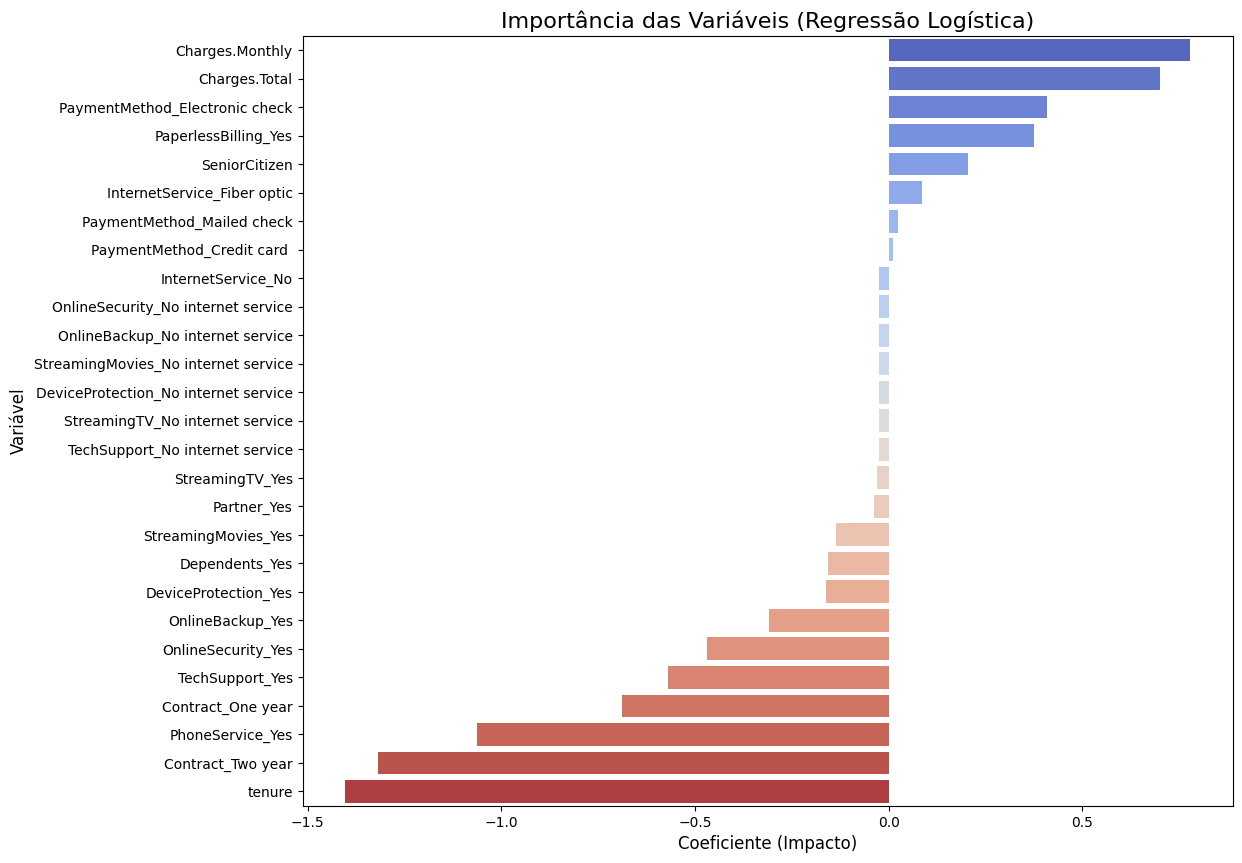

In [118]:
# --- Análise dos Coeficientes ---
feature_names = X_train_scaled.columns
coeficientes = model_lr.coef_[0]

# Criar um DataFrame para visualização
importancia_lr = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)


# 📈 Gerar o gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Coeficiente', y='Variável', data=importancia_lr, palette='coolwarm')
plt.title('Importância das Variáveis (Regressão Logística)', fontsize=16)
plt.xlabel('Coeficiente (Impacto)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()


###  📝Análise de Variáveis no Random Forest
O Random Forest calcula a importância das variáveis com base em como cada variável contribui para a redução da impureza (por exemplo, a impureza de Gini) durante as divisões das árvores. Uma pontuação mais alta indica que a variável foi mais útil para a precisão do modelo.

/tmp/ipython-input-2552147688.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=importancia_rf.head(15), palette='viridis')


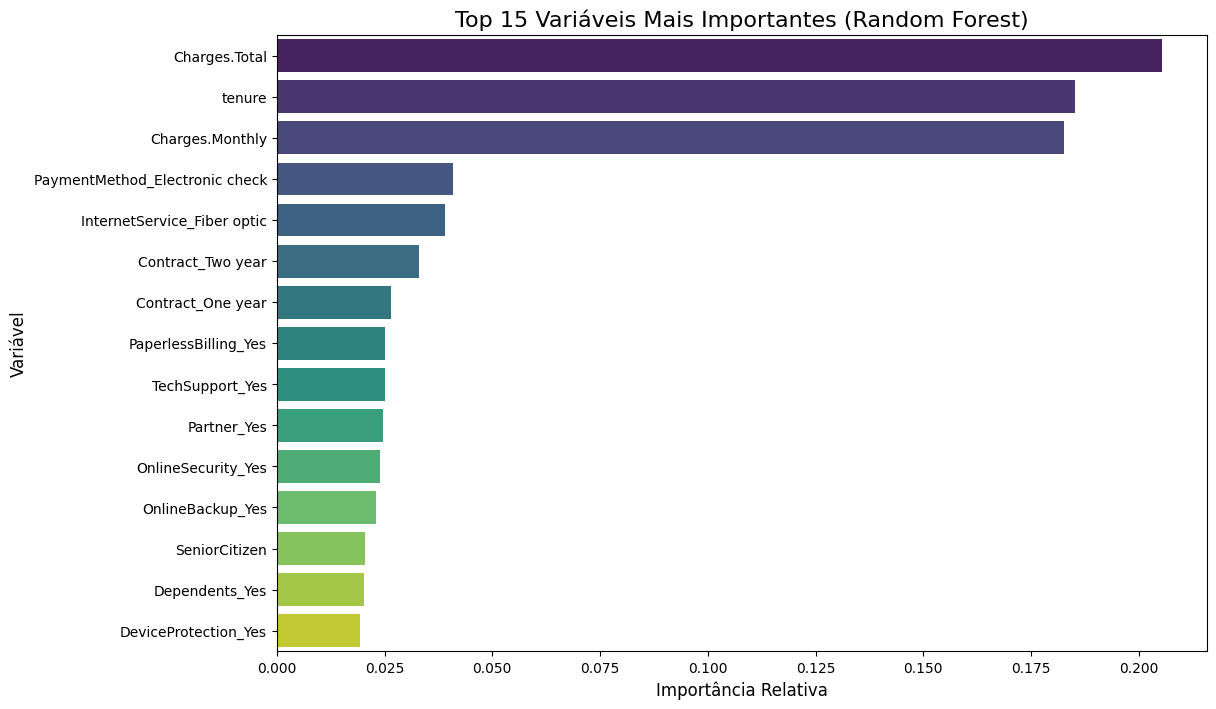

In [117]:

# --- Análise da Importância das Variáveis ---
feature_importances = model_rf.feature_importances_
feature_names = X_train.columns

# Criar um DataFrame para visualização
importancia_rf = pd.DataFrame({
    'Variável': feature_names,
    'Importância': feature_importances
}).sort_values(by='Importância', ascending=False)
# 📈 Visualização em gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=importancia_rf.head(15), palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()


#Análise de Dados e Estratégias para Reduzir a Evasão de Clientes 📊

Este relatório apresenta uma análise detalhada dos principais fatores que influenciam a evasão de clientes (Churn). Com base na exploração dos dados, identificamos padrões de comportamento e relações cruciais para entender por que os clientes cancelam. O objetivo é traduzir esses insights em estratégias de retenção eficazes e acionáveis.

  🔍 Principais Fatores que Impulsionam a Evasão
A análise mostrou que a decisão de cancelar o serviço não é aleatória, mas está diretamente ligada a variáveis específicas. Identificamos as seguintes como as mais influentes:

  - Tempo de Permanência (tenure): Clientes mais novos são o grupo de maior risco. A taxa de evasão é significativamente maior nos primeiros meses e diminui drasticamente com o tempo. 📉

  - Contrato: O tipo de contrato é o fator mais crítico para a retenção. Clientes com contratos de 2 anos têm a menor probabilidade de evadir, enquanto contratos mensais representam o maior risco. ✅

  - Serviço de Internet: O serviço de fibra óptica tem uma forte correlação com a evasão, indicando que clientes que usam esse serviço são mais propensos a cancelar. Isso pode sugerir problemas de insatisfação. 📈

  - Método de Pagamento: O uso de cheque eletrônico é um forte indicador de risco de churn. Esse método pode ser um sinal de clientes menos engajados ou insatisfeitos com a experiência de pagamento. ⚠️

  - Custo Mensal: Clientes com cobranças mensais mais altas tendem a evadir. O preço é um fator decisivo na decisão de permanência. 💰

   🚀 Estratégias de Retenção Propostas
Com base nos fatores identificados, propomos ações proativas para reduzir o churn:

  1. Programa de Boas-Vindas e Engajamento Antecipado

    - Motivação: Clientes com baixo tenure são os mais vulneráveis.

    - Ação: Lançar um programa de acompanhamento proativo nos primeiros 3 a 6 meses. O contato pode ser por email, SMS ou ligação para garantir a satisfação, solucionar dúvidas e reforçar o valor dos serviços.

  2. Incentivo à Fidelização com Contratos de Longo Prazo

    - Motivação: A lealdade aumenta drasticamente com contratos de 1 ou 2 anos.

    - Ação: Oferecer pacotes exclusivos com descontos, bônus ou benefícios adicionais (como acesso a plataformas de streaming) para clientes que migrarem de planos mensais para contratos de longo prazo.

  3. Melhoria e Otimização do Serviço de Fibra Óptica

   - Motivação: Clientes de fibra óptica representam um grupo de alto risco.

   - Ação: Realizar pesquisas de satisfação e auditorias de qualidade para o serviço de fibra óptica. Otimizar a velocidade, estabilidade e o suporte técnico para garantir a melhor experiência possível.

  4. Incentivo a Métodos de Pagamento mais Estáveis

   - Motivação: O método de pagamento via cheque eletrônico é um indicador de churn.

   - Ação: Oferecer um bônus ou pequeno desconto para clientes que trocarem seu método de pagamento para débito automático ou cartão de crédito. Investigar e otimizar a experiência do usuário com o método de cheque eletrônico.